In [1]:
# importing libraries

# for data manipulation
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to vectorize text data
from sklearn.feature_extraction.text import TfidfVectorizer

# lightgbm model used
import lightgbm as lgb

# metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# importing training dataset
train = pd.read_csv('ticket_train.csv')

# importing validating dataset
valid = pd.read_csv('ticket_valid.csv')

In [3]:
# top 5 records
train.head()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,Impact_1,info
0,1,5,13,105,32,3,4,search for old outlook thursday octob old hi f...
1,1,4,1,7,46,3,4,want to access account document want document ...
2,1,4,1,7,65,3,4,access right tuesday pm right hi instal comput...
3,0,4,21,41,32,1,3,plea someon come and check the excel on thi co...
4,0,4,21,77,65,1,3,not work via sent thursday work via hi tri acc...


In [4]:
# top 5 records
valid.head()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,Impact_1,info
0,1,4,1,21,35,3,4,pend expen claim juli pm re pend expen claim h...
1,1,5,13,7,32,3,4,us adapt adapt dear near futur go plea help pl...
2,0,4,51,78,4,2,0,intern audit leaver vs activ ad account leaver...
3,1,4,2,88,68,3,4,oracl list expen report pm expen report hi how...
4,1,4,3,88,56,3,4,cancel incid with progress task cancel incid p...


In [5]:
# vectorizer instance
tfidf = TfidfVectorizer(max_features=5000)

In [6]:
# fitting and transforming tfidf vectorizer
tfidf_train_df = tfidf.fit_transform(train['info'])

In [7]:
# transforming the valid dataset's info column using tfidf vectorizer
tfidf_valid_df = tfidf.transform(valid['info'])

In [9]:
# features and target of training dataset
X_train = tfidf_train_df
y_train = train['ticket_type']

# features and target of validating dataset
X_valid = tfidf_valid_df
y_valid = valid['ticket_type']

In [11]:
y_train.head

<bound method NDFrame.head of 0        1
1        1
2        1
3        0
4        0
        ..
38834    0
38835    1
38836    1
38837    0
38838    1
Name: ticket_type, Length: 38839, dtype: int64>

In [12]:
clf = lgb.LGBMClassifier()

In [13]:
clf.fit(X_train,y_train)

LGBMClassifier()

In [14]:
y_valid_preds=clf.predict(X_valid)

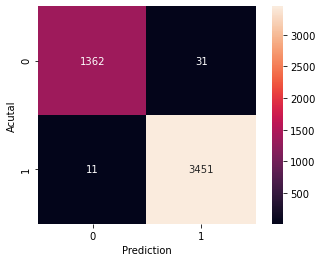

In [15]:
con_mat = confusion_matrix(y_valid, y_valid_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [16]:
acc = accuracy_score(y_valid, y_valid_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 99.13%.


In [17]:
print(classification_report(y_valid, y_valid_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1393
           1       0.99      1.00      0.99      3462

    accuracy                           0.99      4855
   macro avg       0.99      0.99      0.99      4855
weighted avg       0.99      0.99      0.99      4855

